In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [5]:
%matplotlib inline

In [28]:
locals()

{'In': ['',
  'print(w0,w1)',
  'w0 = 1.0097400788703377\nw1\t0.11513393342270017\nprint(w0,w1)',
  'w0 = 1.0097400788703377\nw1 = 0.11513393342270017\nprint(w0,w1)',
  'import pandas as pd',
  'import pandas as pd',
  "df_test = pd.read_csv('test.csv')",
  'df_test.head()',
  "def makepred(row):\n    x = row['x']\n    return w0 + w1 * x",
  "df_test['predictions'] = df_test.apply(makepred, index = 1)",
  "def makepred(row):\n    x = row['x']\n    return float(w0 + w1 * x)",
  "df_test['predictions'] = df_test.apply(makepred, index = 1)",
  'df_test.head()',
  "df_test['predictions'] = df_test.apply(makepred, axis = 1)",
  "df_test['predictions']",
  'df_test.head()',
  'w0 = 1.007542738696266\nw1 = 0.15462614276775377',
  '77 * 0.15462614276775377 + 1.007542738696266',
  "def makepred(row):\n    x = row['x']\n    return float(w0 + w1 * x)",
  "df_test['predictions'] = df_test.apply(makepred, axis = 1)",
  'df_test.head()',
  'df_test.head(40)',
  "df_test['diff'] = df['y'] - df['predi

In [5]:
df_train = pd.read_csv('train.csv')

In [6]:
df_train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


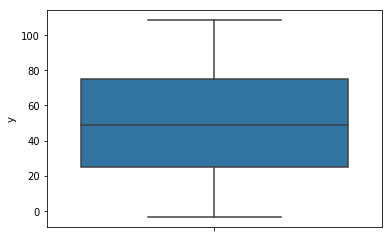

In [7]:
sns.boxplot(y = df_train['y'])

C:\Users\uday\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


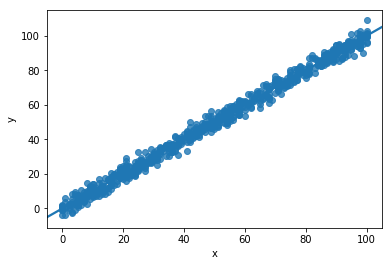

In [8]:
sns.regplot(x= df_train['x'], y = df_train['y'])

In [37]:
# Yprediction = w0 + w1x
#initially w0 = 1, w1 = 0.5
#initially for 2 weights

n = df_train.shape[0]  #no of samples
def initialize_weights(a, b):
    '''
    pass w0, w1
    initializes weights for the regression line
    returns w0, w1
    '''
    return a, b

def initialize_trainingsteps(x):
    '''
    set no of training steps as passed
    '''
    return x

def calculateerror(x,y,w0,w1):
    '''
    x, y, w0, w1
    returns errorValue
    calculates mean squared error for each pair of weights
    '''
    errorvalue = (y - (w0 + w1 * x)) ** 2
    #keeping the error value to be at a limited decimal places
    errorvalue = float("%.5f" % errorvalue)
    return float(errorvalue)

def updateweights(df_train, w0, w1):
    '''
    x, y, w0, w1
    returns w0, w1
    updating the weights simultaneously
    '''
    n = df_train.shape[0]
    learningRate = 0.0001
    for index, row in df_train.iterrows():
        y = row['y']
        x = row['x']
        temp0 = w0
        temp1 = w1
        temp0 -= learningRate * ( -1 *(y - (w1 * x + w0)) / n)
        temp1 -= learningRate * ((y - (w1 * x + w0) * -1 * x) / n)
    return temp0, temp1

In [10]:
## extra floats in y values resulted in 1.2558874584 like numbers hard to calculate 
#removing those to 5 decimal places
#guess this was not the problem there were NaN values duh!!
# replacing them with 0
for index, row in df_train.iterrows():
#     row['y'] = float("%.5f" % row['y'])
    if math.isnan(row['x']):
        row['x'] = 0
    if math.isnan(row['y']):
        row['y'] = 0

error after 0 step 	3671582.4519799994
updation step 0 	 1.0000064964665	 w1	0.4993005035335
error after 1 step 	3664447.8142199945
error delta for step = 1 	  -7134
updation step 1 	 1.0000130026250944	 w1	0.49860194720015655
error after 2 step 	3657337.2138099964
error delta for step = 2 	  -7110
updation step 2 	 1.0000195184627543	 w1	0.4979043297361621
error after 3 step 	3650250.5800599977
error delta for step = 3 	  -7086
updation step 3 	 1.000026043966468	 w1	0.497207649879408
error after 4 step 	3643187.8417700045
error delta for step = 4 	  -7062
updation step 4 	 1.000032579123242	 w1	0.4965119063694823
error after 5 step 	3636148.9282700047
error delta for step = 5 	  -7038
updation step 5 	 1.0000391239200996	 w1	0.4958170979476672
error after 6 step 	3629133.7688700007
error delta for step = 6 	  -7015
updation step 6 	 1.0000456783440819	 w1	0.4951232233569372
error after 7 step 	3622142.293369996
error delta for step = 7 	  -6991
updation step 7 	 1.000052242382247	 w1

error after 62 step 	3272107.986099996
error delta for step = 62 	  -5791
updation step 62 	 1.0004276989269445	 w1	0.45771861174271045
error after 63 step 	3266336.4407600006
error delta for step = 63 	  -5771
updation step 63 	 1.000434781231582	 w1	0.45707594157554143
error after 64 step 	3260584.881120003
error delta for step = 64 	  -5751
updation step 64 	 1.00044187244078	 w1	0.4564341351507466
error after 65 step 	3254853.247590003
error delta for step = 65 	  -5731
updation step 65 	 1.0004489725425683	 w1	0.45579319130720947
error after 66 step 	3249141.48059
error delta for step = 66 	  -5711
updation step 66 	 1.0004560815249925	 w1	0.4551531088853743
error after 67 step 	3243449.5208499967
error delta for step = 67 	  -5691
updation step 67 	 1.0004631993761148	 w1	0.45451388672724424
error after 68 step 	3237777.3089799993
error delta for step = 68 	  -5672
updation step 68 	 1.000470326084013	 w1	0.45387552367637907
error after 69 step 	3232124.7858400014
error delta for

error after 123 step 	2954553.7894699965
error delta for step = 123 	  -4672
updation step 123 	 1.000875592315827	 w1	0.4200553937272788
error after 124 step 	2949897.9274099986
error delta for step = 124 	  -4655
updation step 124 	 1.0008831964610723	 w1	0.41946334209905956
error after 125 step 	2945258.7008700036
error delta for step = 125 	  -4639
updation step 125 	 1.000890808809375	 w1	0.4188720861674357
error after 126 step 	2940636.059459998
error delta for step = 126 	  -4622
updation step 126 	 1.0008984293497083	 w1	0.4182816248627637
error after 127 step 	2936029.953329998
error delta for step = 127 	  -4606
updation step 127 	 1.0009060580710596	 w1	0.4176919571168379
error after 128 step 	2931440.33234
error delta for step = 128 	  -4589
updation step 128 	 1.0009136949624313	 w1	0.4171030818628886
error after 129 step 	2926867.1466399995
error delta for step = 129 	  -4573
updation step 129 	 1.0009213400128405	 w1	0.4165149980355801
error after 130 step 	2922310.34657

error after 184 step 	2699252.990459995
error delta for step = 184 	  -3741
updation step 184 	 1.001354067519284	 w1	0.3853586117256037
error after 185 step 	2695524.878650003
error delta for step = 185 	  -3728
updation step 185 	 1.0013621523944405	 w1	0.38481319089877863
error after 186 step 	2691810.5845799968
error delta for step = 186 	  -3714
updation step 186 	 1.0013702448264163	 w1	0.3842685030834288
error after 187 step 	2688110.0660099997
error delta for step = 187 	  -3700
updation step 187 	 1.0013783448050528	 w1	0.3837245472941774
error after 188 step 	2684423.2810599976
error delta for step = 188 	  -3686
updation step 188 	 1.0013864523202054	 w1	0.38318132254697207
error after 189 step 	2680750.18777
error delta for step = 189 	  -3673
updation step 189 	 1.0013945673617426	 w1	0.38263882785908354
error after 190 step 	2677090.7439300017
error delta for step = 190 	  -3659
updation step 190 	 1.001402689919547	 w1	0.3820970622491035
error after 191 step 	2673444.907

error after 244 step 	2498635.5238199965
error delta for step = 244 	  -2981
updation step 244 	 1.0018521945342747	 w1	0.35389770915971647
error after 245 step 	2495665.688949999
error delta for step = 245 	  -2969
updation step 245 	 1.0018607152964913	 w1	0.3533945693777374
error after 246 step 	2492707.3400800023
error delta for step = 246 	  -2958
updation step 246 	 1.0018692430295706	 w1	0.352892105769429
error after 247 step 	2489760.4416500027
error delta for step = 247 	  -2946
updation step 247 	 1.0018777777241417	 w1	0.3523903174258206
error after 248 step 	2486824.9578900044
error delta for step = 248 	  -2935
updation step 248 	 1.0018863193708463	 w1	0.35188920343916363
error after 249 step 	2483900.8534700014
error delta for step = 249 	  -2924
updation step 249 	 1.0018948679603388	 w1	0.35138876290292964
error after 250 step 	2480988.093590001
error delta for step = 250 	  -2912
updation step 250 	 1.001903423483286	 w1	0.3508889949118088
error after 251 step 	247808

error after 305 step 	2337266.0183600006
error delta for step = 305 	  -2340
updation step 305 	 1.0023843869261695	 w1	0.3244114944365248
error after 306 step 	2334935.248069999
error delta for step = 306 	  -2330
updation step 306 	 1.0023933162070484	 w1	0.32394798096478405
error after 307 step 	2332613.9706399976
error delta for step = 307 	  -2321
updation step 307 	 1.002402251909624	 w1	0.32348509039763124
error after 308 step 	2330302.156100003
error delta for step = 308 	  -2311
updation step 308 	 1.002411194025264	 w1	0.3230228218977046
error after 309 step 	2327999.7743399953
error delta for step = 309 	  -2302
updation step 309 	 1.0024201425453472	 w1	0.32256117462876804
error after 310 step 	2325706.7962100008
error delta for step = 310 	  -2292
updation step 310 	 1.0024290974612642	 w1	0.3221001477557096
error after 311 step 	2323423.191870001
error delta for step = 311 	  -2283
updation step 311 	 1.002438058764417	 w1	0.32163974044454
error after 312 step 	2321148.93

error after 365 step 	2213241.163470001
error delta for step = 365 	  -1819
updation step 365 	 1.0029312203494882	 w1	0.2976751134784153
error after 366 step 	2211429.955970002
error delta for step = 366 	  -1811
updation step 366 	 1.0029405200420987	 w1	0.2972475299446164
error after 367 step 	2209626.5947999978
error delta for step = 367 	  -1803
updation step 367 	 1.0029498256584666	 w1	0.2968205210153031
error after 368 step 	2207831.05513
error delta for step = 368 	  -1795
updation step 368 	 1.0029591371906288	 w1	0.29639408591804284
error after 369 step 	2206043.3114699996
error delta for step = 369 	  -1787
updation step 369 	 1.002968454630633	 w1	0.29596822388144134
error after 370 step 	2204263.339150001
error delta for step = 370 	  -1779
updation step 370 	 1.002977777970537	 w1	0.2955429341351414
error after 371 step 	2202491.1130399974
error delta for step = 371 	  -1772
updation step 371 	 1.0029871072024101	 w1	0.2951182159098213
error after 372 step 	2200726.60863

error after 425 step 	2117632.6213200027
error delta for step = 425 	  -1388
updation step 425 	 1.0034994195979734	 w1	0.273011217561453
error after 426 step 	2116250.1836199975
error delta for step = 426 	  -1382
updation step 426 	 1.0035090609805415	 w1	0.27261677795356204
error after 427 step 	2114874.2092599976
error delta for step = 427 	  -1375
updation step 427 	 1.0035187078275383	 w1	0.27222286839525056
error after 428 step 	2113504.6769999983
error delta for step = 428 	  -1369
updation step 428 	 1.003528360131618	 w1	0.27182948817398056
error after 429 step 	2112141.565959999
error delta for step = 429 	  -1363
updation step 429 	 1.0035380178854447	 w1	0.27143663657817174
error after 430 step 	2110784.855120001
error delta for step = 430 	  -1356
updation step 430 	 1.0035476810816923	 w1	0.2710443128972005
error after 431 step 	2109434.5238599996
error delta for step = 431 	  -1350
updation step 431 	 1.003557349713045	 w1	0.27065251642139837
error after 432 step 	21080

error after 485 step 	2045434.7757099995
error delta for step = 485 	  -1035
updation step 485 	 1.0040873279627802	 w1	0.2502591059275675
error after 486 step 	2044404.8831099987
error delta for step = 486 	  -1029
updation step 486 	 1.0040972845406226	 w1	0.24989524026128396
error after 487 step 	2043380.2934299987
error delta for step = 487 	  -1024
updation step 487 	 1.0041072461591811	 w1	0.24953186354446696
error after 488 step 	2042360.9891900003
error delta for step = 488 	  -1019
updation step 488 	 1.0041172128116798	 w1	0.24916897511982877
error after 489 step 	2041346.952339998
error delta for step = 489 	  -1014
updation step 489 	 1.0041271844913513	 w1	0.24880657433096517
error after 490 step 	2040338.1655599996
error delta for step = 490 	  -1008
updation step 490 	 1.0041371611914378	 w1	0.24844466052235437
error after 491 step 	2039334.6117500009
error delta for step = 491 	  -1003
updation step 491 	 1.0041471429051905	 w1	0.24808323303935573
error after 492 step 	

error after 545 step 	1992447.8407799986
error delta for step = 545 	  -745
updation step 545 	 1.0046934171964772	 w1	0.22927053857624796
error after 546 step 	1991706.5851099994
error delta for step = 546 	  -741
updation step 546 	 1.0047036645293117	 w1	0.22893487614418626
error after 547 step 	1990969.660430001
error delta for step = 547 	  -736
updation step 547 	 1.0047139165120045	 w1	0.22859966474838625
error after 548 step 	1990237.051639997
error delta for step = 548 	  -732
updation step 548 	 1.004724173138305	 w1	0.22826490378252637
error after 549 step 	1989508.744169999
error delta for step = 549 	  -728
updation step 549 	 1.0047344344019706	 w1	0.22793059264110005
error after 550 step 	1988784.7236699993
error delta for step = 550 	  -724
updation step 550 	 1.0047447002967678	 w1	0.22759673071941475
error after 551 step 	1988064.9747
error delta for step = 551 	  -719
updation step 551 	 1.0047549708164707	 w1	0.2272633174135908
error after 552 step 	1987349.48346999

error after 606 step 	1954646.9931499988
error delta for step = 606 	  -506
updation step 606 	 1.0053267930947896	 w1	0.2095991239755233
error after 607 step 	1954144.3910300008
error delta for step = 607 	  -502
updation step 607 	 1.005337312926744	 w1	0.20928989395810674
error after 608 step 	1953645.2942299983
error delta for step = 608 	  -499
updation step 608 	 1.0053478370422402	 w1	0.2089810794442345
error after 609 step 	1953149.69056
error delta for step = 609 	  -495
updation step 609 	 1.0053583654355198	 w1	0.20867267987535107
error after 610 step 	1952657.5677100006
error delta for step = 610 	  -492
updation step 610 	 1.0053688981008322	 w1	0.20836469469365188
error after 611 step 	1952168.9134199992
error delta for step = 611 	  -488
updation step 611 	 1.0053794350324345	 w1	0.20805712334208212
error after 612 step 	1951683.7155399986
error delta for step = 612 	  -485
updation step 612 	 1.0053899762245917	 w1	0.20774996526433587
error after 613 step 	1951201.96159

error after 667 step 	1929978.6219999995
error delta for step = 667 	  -312
updation step 667 	 1.0059761384623958	 w1	0.19147674789627248
error after 668 step 	1929668.5911000003
error delta for step = 668 	  -310
updation step 668 	 1.0059869093259408	 w1	0.19119186794314577
error after 669 step 	1929361.3785600008
error delta for step = 669 	  -307
updation step 669 	 1.0059976841355693	 w1	0.19090737076011982
error after 670 step 	1929056.9738800004
error delta for step = 670 	  -304
updation step 670 	 1.006008462885977	 w1	0.19062325583264222
error after 671 step 	1928755.36699
error delta for step = 671 	  -301
updation step 671 	 1.0060192455718657	 w1	0.19033952264685233
error after 672 step 	1928456.5479200014
error delta for step = 672 	  -298
updation step 672 	 1.0060300321879454	 w1	0.19005617068958022
error after 673 step 	1928160.5061100016
error delta for step = 673 	  -296
updation step 673 	 1.0060408227289326	 w1	0.18977319944834586
error after 674 step 	1927867.231

error after 727 step 	1916029.3467399988
error delta for step = 727 	  -160
updation step 727 	 1.0066291967429284	 w1	0.17504417808792072
error after 728 step 	1915871.30805
error delta for step = 728 	  -158
updation step 728 	 1.0066401952216468	 w1	0.17478137680660452
error after 729 step 	1915715.5252700036
error delta for step = 729 	  -155
updation step 729 	 1.0066511973404688	 w1	0.174518928615346
error after 730 step 	1915561.9899500003
error delta for step = 730 	  -153
updation step 730 	 1.0066622030945012	 w1	0.17425683303949116
error after 731 step 	1915410.6937300009
error delta for step = 731 	  -151
updation step 731 	 1.006673212478857	 w1	0.1739950896050242
error after 732 step 	1915261.6277799988
error delta for step = 732 	  -149
updation step 732 	 1.0066842254886565	 w1	0.17373369783856646
error after 733 step 	1915114.7840099994
error delta for step = 733 	  -146
updation step 733 	 1.0066952421190256	 w1	0.17347265726737568
error after 734 step 	1914970.153750

error after 788 step 	1910223.9122700023
error delta for step = 788 	  -36
updation step 788 	 1.0073065926040445	 w1	0.15964269987926985
error after 789 step 	1910188.7960900005
error delta for step = 789 	  -35
updation step 789 	 1.007317804406476	 w1	0.15940059099810605
error after 790 step 	1910155.4612700015
error delta for step = 790 	  -33
updation step 790 	 1.0073290195622429	 w1	0.15915880739050198
error after 791 step 	1910123.9010099997
error delta for step = 791 	  -31
updation step 791 	 1.0073402380668377	 w1	0.158917348619197
error after 792 step 	1910094.1081699997
error delta for step = 792 	  -29
updation step 792 	 1.0073514599157585	 w1	0.15867621424751838
error after 793 step 	1910066.0754700003
error delta for step = 793 	  -28
updation step 793 	 1.0073626851045097	 w1	0.15843540383938026
error after 794 step 	1910039.7964100018
error delta for step = 794 	  -26
updation step 794 	 1.0073739136286015	 w1	0.15819491695928314
error after 795 step 	1910015.2634199

updation step 850 	 1.0080078983543725	 w1	0.14523082720710798
error after 851 step 	1911223.3033799974
error delta for step = 851 	  62
updation step 851 	 1.0080193097639958	 w1	0.14500808022356054
error after 852 step 	1911287.4787700009
error delta for step = 852 	  64
updation step 852 	 1.0080307242586255	 w1	0.14478563248565046
error after 853 step 	1911353.0317299983
error delta for step = 853 	  65
updation step 853 	 1.0080421418341148	 w1	0.1445634835911061
error after 854 step 	1911419.9567299988
error delta for step = 854 	  66
updation step 854 	 1.0080535624863218	 w1	0.1443416331381966
error after 855 step 	1911488.2473899992
error delta for step = 855 	  68
updation step 855 	 1.0080649862111108	 w1	0.1441200807257311
error after 856 step 	1911557.8987300002
error delta for step = 856 	  69
updation step 856 	 1.0080764130043514	 w1	0.1438988259530581
error after 857 step 	1911628.9042800018
error delta for step = 857 	  71
updation step 857 	 1.0080878428619184	 w1	0.

error after 911 step 	1917322.8772900011
error delta for step = 911 	  136
updation step 911 	 1.0087094935134684	 w1	0.13217668090238344
error after 912 step 	1917460.07156
error delta for step = 912 	  137
updation step 912 	 1.008721085716034	 w1	0.13197147083424324
error after 913 step 	1917598.327500003
error delta for step = 913 	  138
updation step 913 	 1.0087326807605688	 w1	0.13176653643711556
error after 914 step 	1917737.6396399965
error delta for step = 914 	  139
updation step 914 	 1.0087442786432523	 w1	0.13156187734041977
error after 915 step 	1917878.0036799985
error delta for step = 915 	  140
updation step 915 	 1.0087558793602693	 w1	0.13135749317407341
error after 916 step 	1918019.4145099977
error delta for step = 916 	  141
updation step 916 	 1.0087674829078097	 w1	0.13115338356849157
error after 917 step 	1918161.8676999996
error delta for step = 917 	  142
updation step 917 	 1.0087790892820685	 w1	0.13094954815458615
error after 918 step 	1918305.3582399995


error after 971 step 	1927276.8521600012
error delta for step = 971 	  192
updation step 971 	 1.009409927685282	 w1	0.12033957254825968
error after 972 step 	1927469.777769998
error delta for step = 972 	  192
updation step 972 	 1.009421683816287	 w1	0.12015026353874653
error after 973 step 	1927663.5037600012
error delta for step = 973 	  193
updation step 973 	 1.0094334425688947	 w1	0.11996120882467992
error after 974 step 	1927858.02617
error delta for step = 974 	  194
updation step 974 	 1.0094452039395805	 w1	0.11977240806421412
error after 975 step 	1928053.3418499974
error delta for step = 975 	  195
updation step 975 	 1.0094569679248253	 w1	0.11958386091596293
error after 976 step 	1928249.446139998
error delta for step = 976 	  196
updation step 976 	 1.0094687345211144	 w1	0.11939556703899908
error after 977 step 	1928446.3354900002
error delta for step = 977 	  196
updation step 977 	 1.0094805037249377	 w1	0.11920752609285358
error after 978 step 	1928644.0058299992
er

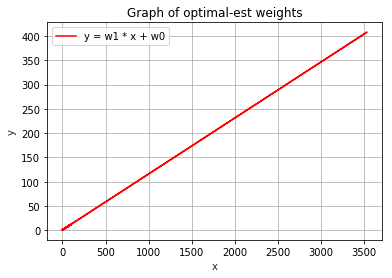

In [38]:
if __name__ == '__main__':
    w0, w1 = initialize_weights(1, 0.5)
    trainingsteps = initialize_trainingsteps(1000)
    errorsls = []
    for i in range(trainingsteps):
        error = 0
        new_error = error
        for index, row in df_train.iterrows():
            new_err = calculateerror(row['x'], row['y'], w0, w1)
            error = error + new_err
            
        #     error = float("%.3f" % error)
            if index == 699: #JUST CURIOUS ABOUT THE ERROR
                print('error after %d step' %i, end = ' ')
                print('\t' + str(error))
                errorsls.append(error)
        #update the weights now and calculate error again
        if len(errorsls) >= 2:
            print('error delta for step = %d \t  %d' %(i ,errorsls[-1] - errorsls[-2]))
        w0, w1 = updateweights(df_train, w0, w1)
        print('updation step %d \t' %i, end = ' ')
        print( str(w0 )+ '\t w1\t' + str(w1))
    print(errorsls)
    x = df_train['x']
    y = w1 * x + w0
#     plt.scatter(x)
    plt.plot(x, y, '-r', label='y = w1 * x + w0')
    plt.title('Graph of optimal-est weights')
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

In [89]:
df_train.iloc[213,:]
#after treating nan lol

x    3530.157369
y       0.000000
Name: 213, dtype: float64

In [39]:
k = 0
dtuplelist = []
for i in errorsls:
    k += 1
    dtuplelist.append((k,i))
dfdf = pd.DataFrame(data = dtuplelist, columns =['ind', 'errors'])

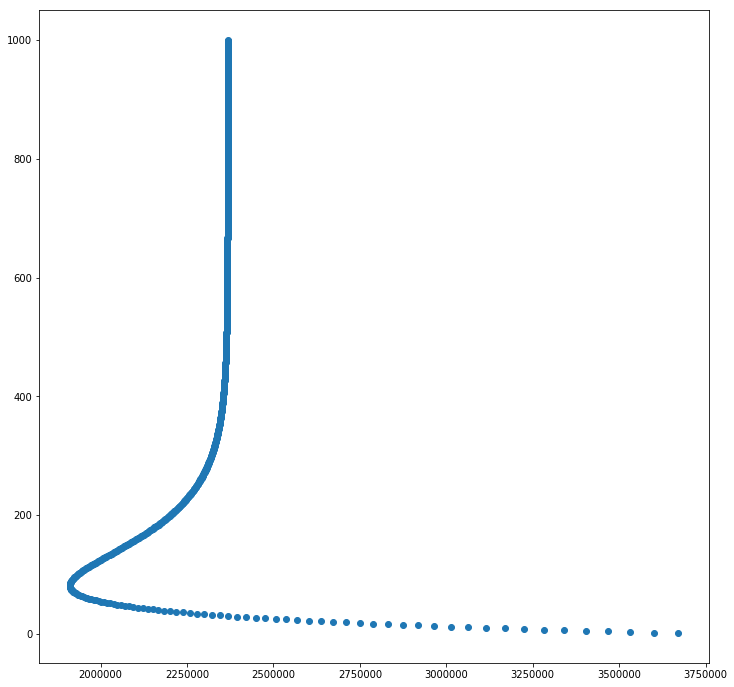

In [32]:
#learing rate = 0.001 lol my w0 was misbehaving without -1 * factor
plt.figure(figsize= (12,12))
plt.scatter(x = dfdf['errors'], y = dfdf['ind'])

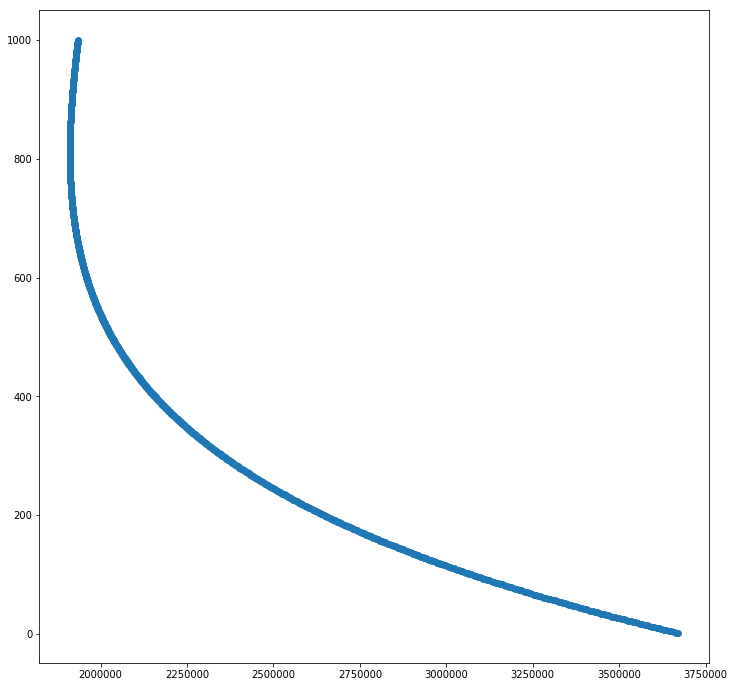

In [36]:

#learning rate 0.0001
plt.figure(figsize= (12,12))
plt.scatter(x = dfdf['errors'], y = dfdf['ind'])

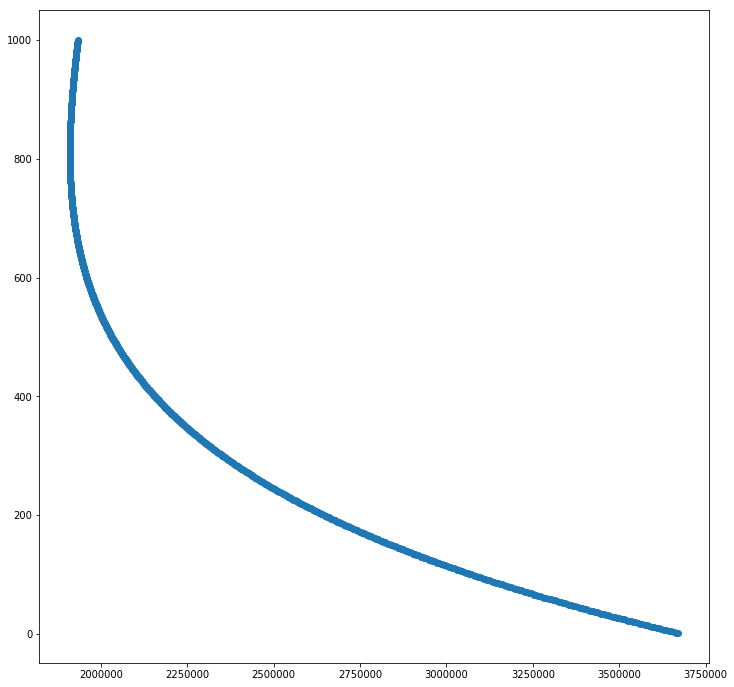

In [40]:
# best parameters with good values

plt.figure(figsize= (12,12))
plt.scatter(x = dfdf['errors'], y = dfdf['ind'])

In [2]:
w0 = 1.0097400788703377
w1 = 0.11513393342270017
print(w0,w1)

1.0097400788703377 0.11513393342270017


In [6]:
df_test = pd.read_csv('test.csv')

In [7]:
df_test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [8]:
def makepred(row):
    x = row['x']
    return float(w0 + w1 * x)

In [9]:
df_test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [10]:
df_test['predictions'] = df_test.apply(makepred, axis = 1)

In [11]:
w0 = 1.007542738696266
w1 = 0.15462614276775377

In [17]:
77 * 0.15462614276775377 + 1.007542738696266

12.913755731813307

In [12]:
df_test['diff'] = df_test['y'] - df_test['predictions']
df_test.head()

,x,y,predictions,diff
0,77,79.775152,9.875053,69.900099
1,21,23.177279,3.427553,19.749726
2,22,25.609262,3.542687,22.066575
3,20,17.857388,3.312419,14.544969
4,36,41.849864,5.154562,36.695303


In [26]:
error = 0
for index,row in df_test.iterrows():
    error += row['diff'] ** 2
print(error)

719632.5751516322


C:\Users\uday\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


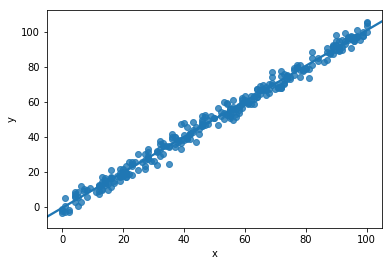

In [13]:
sns.regplot(x= df_test['x'], y = df_test['y'])

In [15]:
errorsls

# Using Linear Regression Model from sklearn,
# it uses ordinary least squares

In [27]:
import pandas as pd
from sklearn import linear_model
import numpy as np

In [3]:
regr = linear_model.LinearRegression()

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [33]:
x_train = train_df['x'].values.reshape(-1,1)
y_train = train_df['y'].values.reshape(-1,1)

In [34]:
x_test = test_df['x'].values.reshape(-1,1)

In [35]:
y_train.shape

(700, 1)

In [39]:
import math
for index, row in train_df.iterrows():
#     row['y'] = float("%.5f" % row['y'])
    if math.isnan(row['x']):
        row['x'] = 0
    if math.isnan(row['y']):
        row['y'] = 0

In [36]:
# x_train = np.asarray(x_train)
# y_train = np.asarray(y_train)
# x_test = np.asarray(x_test)
x_train.shape
# x_train.values.reshape(-1,1)
# y_train.values.reshape(-1,1)
# x_test.values.reshape(-1,1)

(700, 1)

In [40]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
y_pred = regr.predict(x_test)

In [47]:
y_test = test_df['y'].values.reshape(-1,1)

In [42]:
test_df['pred'] = y_pred

In [43]:
test_df.head()

,x,y,pred
0,77,79.775152,50.583876
1,21,23.177279,48.764150
2,22,25.609262,48.796645
3,20,17.857388,48.731655
4,36,41.849864,49.251576


In [45]:
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[0.03249511]]
Mean squared error: 791.96
Variance score: 0.06


In [50]:
x_test

array([[ 77],
       [ 21],
       [ 22],
       [ 20],
       [ 36],
       [ 15],
       [ 62],
       [ 95],
       [ 20],
       [  5],
       [  4],
       [ 19],
       [ 96],
       [ 62],
       [ 36],
       [ 15],
       [ 65],
       [ 14],
       [ 87],
       [ 69],
       [ 89],
       [ 51],
       [ 89],
       [ 27],
       [ 97],
       [ 58],
       [ 79],
       [ 21],
       [ 93],
       [ 27],
       [ 99],
       [ 31],
       [ 33],
       [ 80],
       [ 28],
       [ 47],
       [ 53],
       [ 69],
       [ 28],
       [ 33],
       [ 91],
       [ 71],
       [ 50],
       [ 76],
       [  4],
       [ 37],
       [ 70],
       [ 68],
       [ 40],
       [ 35],
       [ 94],
       [ 88],
       [ 52],
       [ 31],
       [ 59],
       [  0],
       [ 39],
       [ 64],
       [ 69],
       [ 57],
       [ 13],
       [ 72],
       [ 76],
       [ 61],
       [ 82],
       [ 18],
       [ 41],
       [ 50],
       [ 55],
       [ 13],
       [ 46],
      